# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [2]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (14/14), done.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
# 1.

import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd
import os

print(os.getcwd())

new_directory = "/content/wrangling/assignment"
os.chdir(new_directory)

df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)

# getting rid of commas in the numeric values to preserve as much data as possible
df['Price'].str.replace(',', '')

# converting to a numeric type because this row has number data
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df['Price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# Calculating the number of missing values
print('Total Missings: \n', sum(df['Price_nan']),'\n') # How many missing values are there?



/content
Total Missings: 
 181 



In [4]:
# 2.

df = pd.read_csv('./data/mn_police_use_of_force.csv',low_memory=False)

df.head()

var = 'subject_injury'
print(df[var].unique(), '\n')

# Create a missing dummy:
df['subject_injury_nan'] = df['subject_injury'].isnull() # Equals 1 if missing, 0 if non-null

print('Proportion Missing: \n', sum(df['subject_injury_nan'])/12925,'\n') # How many missing values are there?
# df.count()
# This is a concerning amount of missing data.

print(pd.crosstab(df['subject_injury'],df['force_type']),'\n')

print(pd.crosstab(df['subject_injury_nan'],df['force_type']),'\n')
# A lot of the subject_injury data that is missing seems to come from force types that seem like
# they would cause injury, like bodily force and tasers.



[nan 'No' 'Yes'] 

Proportion Missing: 
 0.7619342359767892 

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172   

force_type          Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_nan                                                    
False                   2          2379     

In [5]:
# 3.

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

var = 'WhetherDefendantWasReleasedPretrial'
print(df[var].unique(), '\n')

df[var] = df[var].replace(9, np.nan)

df['WhetherDefendantWasReleasedPretrial_nan'] = df['WhetherDefendantWasReleasedPretrial'].isnull() # Equals 1 if missing, 0 if non-null


[9 0 1] 



In [21]:
# 4.
var = 'ImposedSentenceAllChargeInContactEvent'
# print(df[var].unique(), '\n')

var2 = 'SentenceTypeAllChargesAtConvictionInContactEvent'
# print(df[[var, var2]], '\n')

# Coerce the variable to numeric because we are looking at number data
df['ImposedSentenceAllChargeInContactEvent'] = \
pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')


# Create a missing dummy so we can easily see what values are missing:
df['ImposedSentenceAllChargeInContactEvent'] = \
df['ImposedSentenceAllChargeInContactEvent'].isnull() # Equals 1 if missing, 0 if non-null

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Axes(0.125,0.11;0.775x0.77) 

Proportion of men:  0.787651154268963
Proportion of unprovoked attacks: 0.7429461341150605
['Not stated' 'Bronze whaler' 'Reportedly Tiger or Bull shark' ...
 'White shark, species identity confirmed by tooth pattern'
 'White shark, 160-kg [353-lb], identity confirmed by tooth pattern'
 ' White shark'] 

Proportion of attacks by a white shark: Species 
White shark                                           180
Shark involvement prior to death was not confirmed     98
Shark involvement not confirmed                        86
Invalid                                                78
Tiger shark                                            75
                                                     ... 
White shark, 16'                                        1
White shark, 5m                                         1
Raggedtooth shark, 150-kg                               1
White shark, 12' to 15'                                 1
 White shark                       

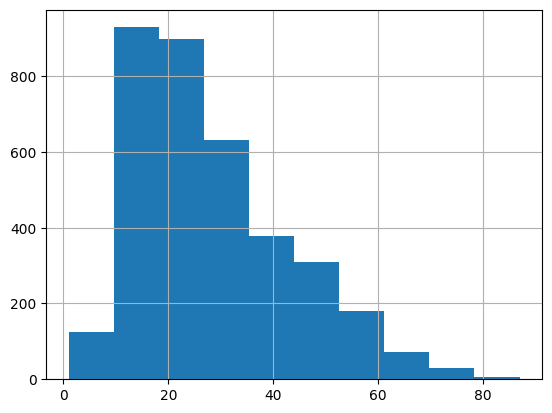

In [107]:
## Insert the xls file with the shark data under /wrangling/assignment/data

# 1
df = pd.read_excel('./data/GSAF5.xls')

# 2
df.drop(['pdf', 'href formula', 'href', 'Case Number', \
         'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], \
        axis = 1, inplace = True)

# 3
## We see years ranging from 0 - 2024
# print(df['Year'].unique(), '\n')
df = df[df['Year'] >= 1940]
# print(df['Year'].unique(), '\n')
# print(df['Year'].hist(), '\n')
# Shark attacks appear to be increasing over time

# 4

df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # Coerce the variable to numeric
# print(df['Age'].unique(), '\n')
print(df['Age'].hist(), '\n')

# 5

# print(df['Sex'].value_counts(), '\n')
# print(df.shape)
print("Proportion of men: ", 4299 / 5458)

# 6

# print(df['Type'].unique(), '\n')

df['Type'] = df['Type'].replace(['Questionable', 'Watercraft' , \
 'Sea Disaster', np.nan, '?', 'Unconfirmed', 'Unverified', 'Invalid' ,\
 'Under investigation', 'Boat'] \
, "Unknown")

# print(df['Type'].unique(), '\n')

print("Proportion of unprovoked attacks:", df['Type'].value_counts(normalize=True).get("Unprovoked"))

# 7
# print(df['Fatal Y/N'].unique(), '\n')
df['Fatal Y/N'] = df['Fatal Y/N'].replace(['F', 'M', np.nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N'] \
, "Unknown")
# print(df['Fatal Y/N'].unique(), '\n')


# 8
# print(pd.crosstab(df['Sex'],df['Type']),'\n')
# Sharks are more likely to attack women unprovoked

#
# print(pd.crosstab(df['Type'],df['Fatal Y/N']),'\n')
# The attack is more likely to be fatal if the attack is unprovoked

#print(pd.crosstab(df['Sex'],df['Fatal Y/N']),'\n')
# Women have a greater chance of being fatally attacked by a shark

# 9
print(df['Species '].unique(), '\n')
# print(df['Species '].value_counts())
# 3% of the attacks were listed as attacks by a white shark

#df.head()

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. 57% of the population is white, 19% Hispanic, 12% black, and 6% Asian.

2. The census bureau gathers data in order to apportion the correct amount of delegates to the states. The quality of the data matters because you want to be accurate because you want to give each state the right amount of delegates because it is these delegates that give states their number of electoral votes.

3. I think one thing the censes does is collect fairly accurate data on white people. However, the census is not so good at collecting data on minority populations like Native Americans and African Americans. The surverys should be adjusted to take a more active effort to collect accurate data on the minority populations. The good practices of the census could be adopted to reach places that are harder to reach to collect more accurate data.

4. The census does a good job on collecting people's gender whether they're male or female. However, the census does not have an option for non-binary or gender fluid people.

5. When it comes to cleaning data, I would be considered that the census would simply drop tiny minorities that the census might disregard like Native Americans or Native Alaskans. When there are missing values, it could be hard to figure out why they are missing. People might adopt good practices like involving all races and sexual identities to be as inclusive as possible.

6. I would be concerned with how exactly the algorithm is getting these values and what dataset the algorithm is using to build the model.
